In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
data = load_iris()
shuffledIndices = np.random.permutation(len(data.target))
data.data, data.target = data.data[shuffledIndices], data.target[shuffledIndices]
train_x, test_x = data.data[:100, 1:3], data.data[100:, 1:3]
train_y, test_y = data.target[:100], data.target[100:]

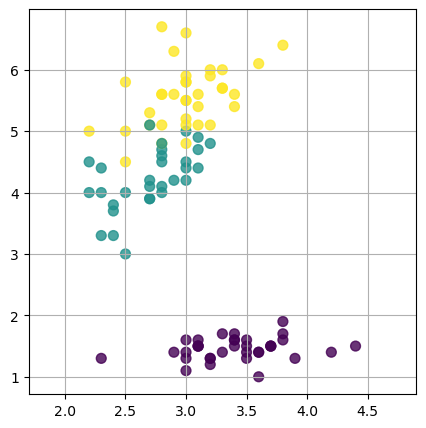

In [3]:
# matplotlib을 통해 해당 자료의 그래프를 그립니다.
plt.figure(figsize=(5,5))
plt.scatter(x=train_x[:, 0], y=train_x[:, 1], s=50, alpha=0.8, c=train_y)
plt.xlim(train_x[:, 0].min() - 0.5, train_x[:, 0].max() + 0.5)
plt.grid()
plt.show()

In [4]:
# 활성화 함수를 정의합니다.
sigmoid = lambda x, e=2.7182: 1 / (1 + e**(-x))
reLu = lambda x: np.array([max(0, obj) for obj in x])
seLu = lambda x, e=2.7182, a=1.0507: np.array([obj if obj >= 0 else a * (e**obj - 1) for obj in x])
actDict = {"sigmoid":sigmoid,"reLu":reLu,"seLu":seLu}

In [5]:
class Perceptron:
    def __init__(self, trainset_x, trainset_y, target):
        self.target = target
        self.weight = np.random.rand(trainset_x.shape[1])
        self.trainY = np.array([1 if self.target == i else 0 for i in trainset_y])
        
    def iterations(self, name, iterations=10000, learning_rate=0.01):
        for epoch in range(iterations):
            indications = actDict[name](np.dot(train_x, self.weight))
            self.weight -= (learning_rate / train_x.shape[0]) * np.dot(train_x.T, (indications - self.trainY))
        
    def predict(self, independent):
        if type(independent) == list:
            independent = np.array(independent)
        return np.dot(independent, self.weight)
    
    def predict_(self, independent):
        if type(independent) == list: independent = np.array(independent)
        return True if np.dot(independent, self.weight) > 0.5 else False

In [6]:
# 퍼셉트론을 세 개 생성합니다.
firstPerc = Perceptron(train_x, train_y, 0)
secondPerc = Perceptron(train_x, train_y, 1)
thirdPerc = Perceptron(train_x, train_y, 2)

In [7]:
# 훈련을 진행합니다.
firstPerc.iterations('seLu')
secondPerc.iterations('seLu')
thirdPerc.iterations('seLu')

In [8]:
# 소프트맥스를 정의합니다.
softmax = lambda case: np.array([np.exp(obj) / np.sum(np.exp(case)) for obj in case])

In [9]:
# 모델을 통해 예측을 만듭니다.
index = random.randrange(len(test_y))
prediction = softmax(np.array([firstPerc.predict(test_x[index, :]), secondPerc.predict(test_x[index, :]), thirdPerc.predict(test_x[index, :])]))
print(f"{prediction}")
print(f"pred: {np.argmax(prediction)}, actual target: {test_y[index]}")

[0.18431054 0.34303292 0.47265654]
pred: 2, actual target: 2


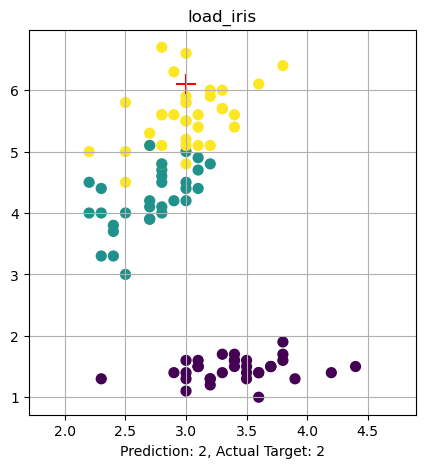

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(x=train_x[:, 0], y=train_x[:, 1], s=50, alpha=1, c=train_y)
plt.scatter(x=test_x[index,0], y=test_x[index,1], c='r', s=200, marker='+')
plt.xlim(train_x[:, 0].min() - 0.5, train_x[:, 0].max() + 0.5)
plt.grid()
# plt.colorbar()
plt.xlabel(f"Prediction: {np.argmax(prediction)}, Actual Target: {test_y[index]}")
plt.title("load_iris")
plt.show()